## Step 1

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\n4\Desktop\EX4.6 Combining and Exporting Data'

In [3]:
df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared', 'cust_ords_prods_merged.pkl'))
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,firstname,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [4]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_spend_per_user', 'high_spenders',
       'median_days_since_prior_ords', 'frequent_user', 'firstname', 'surname',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income', '_merge'],
      dtype='object')

## Step 2

See EX4.9 part 0  file

## Step 3

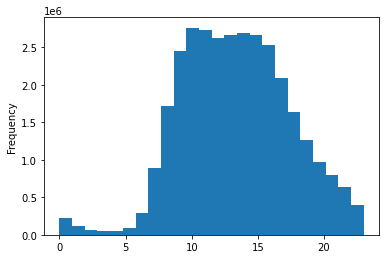

In [76]:
step3_hist = df['order_hour_of_day'].plot.hist(bins = 24)

<b>Interpretation</b><br>

The histogram above shows that the busiest times are between 10am and 3pm during the day. There are large shourly spikes between 5am and 10am. Although not as large as mornings, orders have large decreases after 3pm. The drop in the number of orders slow down around 7pm. No orders seem to occur around 11 and 12 pm. 

## Step 4

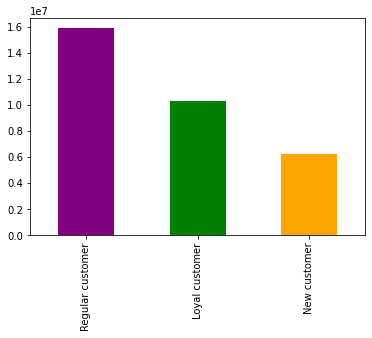

In [77]:
# plt.figure(figsize = (10,5)) # sets the dimensions - x axis * y axis
step4_bar = df['loyalty_flag'].value_counts().plot.bar(color = ['purple','green','orange'], rot = 0)

## Step 5

In [125]:
#genrate see and random number assignment
np.random.seed(5)

dev= np.random.rand(len(df)) <= 0.8

dev

array([ True, False,  True, ...,  True, False,  True])

In [126]:
#get subset of data

small20 = df[~dev]

In [15]:
big80 = df[dev]

In [16]:
#double check matching lengths

(len(big80) + len(small20)) == len(df)

True

In [22]:
df_small = small20[['order_hour_of_day','prices']]
df_small.head()

,order_hour_of_day,prices
1,7,9.0
3,7,9.0
14,7,4.4
27,7,3.0
28,15,3.0


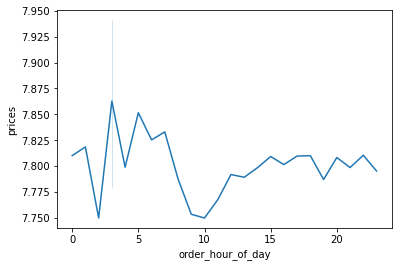

In [23]:
step5_line = sns.lineplot(data = df_small, x = 'order_hour_of_day', y = 'prices')

## Step 6

In [25]:
df_small = small20[['age','n_dependants']]
df_small.head()

,age,n_dependants
1,31,3
3,31,3
14,31,3
27,31,3
28,31,3


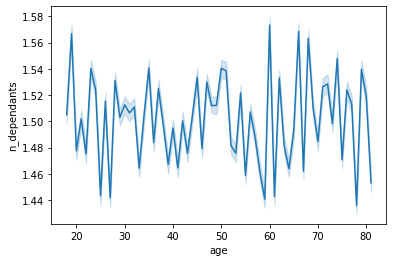

In [26]:
# EDA on customer demographics - explore relationship between age and family status

step6_line = sns.lineplot(data = df_small, x = 'age', y = 'n_dependants')

There is alot of variation in the number of dependents around age. 

## Step 7

In [27]:
# Check relationship between age and spending power
df_small = small20[['age','income']]
df_small.head()

,age,income
1,31,40423
3,31,40423
14,31,40423
27,31,40423
28,31,40423


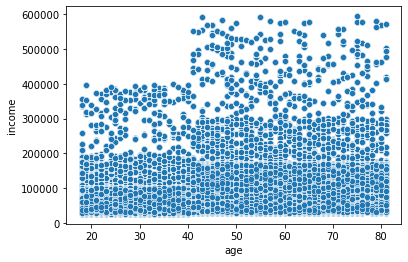

In [28]:
step7_scatter = sns.scatterplot(x = 'age', y = 'income', data = df_small)

In [31]:
#check strength of relationship
# np.corrcoef(df_small['age'],df_small['income'])[0,1]

df_small['age'].corr(df_small['income'])

0.4172465028612235

There is a weak positive relationship between age and the spending power of customers. There is too much variation in the data, thus no trend. The plot shows that before 40 years, there is less spending power. This information can be used to segment customers into an UNDER OR EQUAL TO 40 and OVER 40 group. 

## Step 8

In [15]:
# save files
step3_hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'step3_hist.png'))
step4_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'step4_bar.png'))

# step5_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'step5_line.png'))
# step6_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'step6_line'))
# step7_scatter.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'step7_scatter.png'))


In [127]:
#Alternative 1
# files = [step3_hist,step4_bar,step5_line,step6_line,step7_scatter]
# files = [step3_hist,step4_bar]
# i = 1

# for file in files:
#         file.figure.savefig(os.path.join(path,'04 Analysis','Visualizations',""+str(file.name)+"_plot.png"))
#         print('file is ', file,": file number ", i)
#         print('file.name is', file.name,": file number ", i)
#         i+=1

In [138]:
# Alternative 2
# # files = [step3_hist,step4_bar,step5_line,step6_line,step7_scatter]
# files = [step3_hist,step4_bar]

# for file in files:
# #         fpath = os.path.join(path,'04 Analysis','Visualizations',""+ str(file.name) +"_plot.png")
# #         file.figure.savefig(fpath)
        
#         print('Saved ', file)

Saved  AxesSubplot(0.125,0.125;0.775x0.755)
Saved  AxesSubplot(0.125,0.125;0.775x0.755)
